This is the first lesson in 1D linear convection equation analysis looking at PDE's

In [1]:
import numpy as ny
from matplotlib import pyplot as py
%matplotlib inline

py.rcParams['font.family'] = 'serif'
py.rcParams['font.size'] = 20

now we have to define parameters and grid points 
to solve our system of equations

In [28]:
#parameters

nx = 100 # number of spatial points
L = 2.0 # length of 1D domain
dx = L / (nx -1) # space between each spacial point
nt = 25 # number of time steps
dt = 0.02 #time-step size
c = 1.0 #convection wave speed

#define grid point coordinates
x = ny.linspace(0.0, L, num=nx)

now we need to set initial conditions with 1 as a constant value, but at x = 0.5 the value changes to 2, and then goes back to 1 at x = 1

In [29]:
u0 = ny.ones(nx)

test = ny.where(ny.logical_and(x >= 0.5, x <= 1.0))
print(test)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49]),)


now with this array, we can now update out initial conditions to generate a square shaped wave

In [30]:
u0[test] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


now we plot the initial conditions we've built

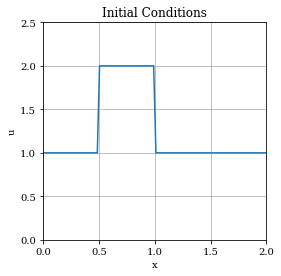

In [31]:
py.figure(figsize=(4.0, 4.0))
py.title('Initial Conditions')
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0)
py.xlim(0.0, L)
py.ylim(0.0, 2.5);

In [32]:
u = u0.copy()
for n in range(1, nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i- 1])
        
print(u0)
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00000012 1.00000363 1.00009054 1.00172943 1.02385443
 1.21432186 2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         1.99999988 1.9

now we plot our solution after a certain nt time steps along with the initial condition

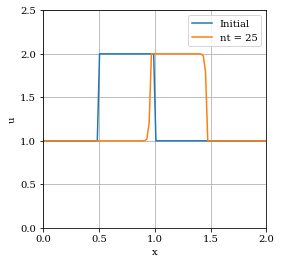

In [33]:
py.figure(figsize=(4.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0, label='Initial')
py.plot(x, un, label= 'nt = {}'.format(nt), color= 'C1')
py.legend()
py.xlim(0.0,L)
py.ylim(0.0, 2.5);

the moving solution differs from the selected square because the discretized equation is an approximation of the continuous equation we want to solve. If you increase the grid fineness(which i have done) it will increase the solution wave.

Now, we will move on to non-linear convection equation

The only difference here is that the linear case has a constant wave speed c, whereas this wave has a variable wace speed set to be u.

In [36]:
# set parameters for non-linear case
nx  = 41 #number of spatial points
L = 2.0 # length of the 1D domain
dx = L / (nx - 1) #spatial grid size
nt = 10 # number of time steps
dt = 0.02 #time-step size

x= ny.linspace(0.0, L, num=nx)
u0 = ny.ones(nx)
test = ny.where(ny.logical_and(x >= 0.5, x <= 1.0))
u0[test] = 2.0

now we can plot the initial conditions to see how it compares

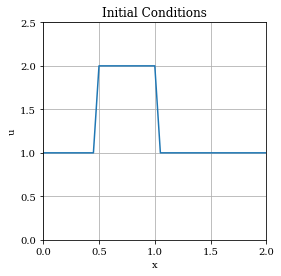

In [39]:
py.figure(figsize=(4.0, 4.0))
py.title('Initial Conditions')
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0)
py.xlim(0.0, L)
py.ylim(0.0, 2.5);

now, we can create code that changes the values within u all at the same time, instead of hwo before we changed them for each iteration.

In [40]:
u = u0.copy()
for n in range(1, nt):
    u[1:] = u[1:] - dt/dx * u[1:] *(u[1:] - u[:-1])

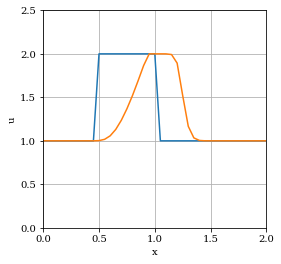

In [42]:
py.figure(figsize=(4.0, 4.0))
py.xlabel('x')
py.ylabel('u')
py.grid()
py.plot(x, u0, label='Initial', color='C0')
py.plot(x, u, label= 'nt = {}'.format(nt), color='C1')
py.xlim(0.0, L)
py.ylim(0.0, 2.5);